In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from glob import glob

In [2]:
files=glob("IRAhandle_tweets_*.csv")
files

['IRAhandle_tweets_1.csv',
 'IRAhandle_tweets_2.csv',
 'IRAhandle_tweets_3.csv',
 'IRAhandle_tweets_4.csv',
 'IRAhandle_tweets_5.csv',
 'IRAhandle_tweets_6.csv',
 'IRAhandle_tweets_7.csv',
 'IRAhandle_tweets_8.csv',
 'IRAhandle_tweets_9.csv']

In [3]:
data = pd.concat((pd.read_csv(file) for file in files),ignore_index=True)

In [4]:
print(data.shape)
data=data.drop_duplicates()
print(data.shape)

(2973371, 15)
(2944667, 15)


In [5]:
data.columns

Index(['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'harvested_date', 'following', 'followers', 'updates',
       'post_type', 'account_type', 'new_june_2018', 'retweet',
       'account_category'],
      dtype='object')

In [6]:
data.dtypes

external_author_id    float64
author                 object
content                object
region                 object
language               object
publish_date           object
harvested_date         object
following               int64
followers               int64
updates                 int64
post_type              object
account_type           object
new_june_2018           int64
retweet                 int64
account_category       object
dtype: object

In [7]:
data['account_type'].unique()

array(['Right', 'Russian', 'Koch', 'Italian', 'left', '?', 'German',
       'Spanish', 'Hashtager', 'Arabic', 'local', 'Commercial', 'French',
       'Ukranian', 'ZAPOROSHIA', 'news', 'right', 'Uzbek', 'Ebola ', nan,
       'Portuguese'], dtype=object)

In [8]:
data['region'].unique()

array(['Unknown', nan, 'United States', 'Italy', 'United Arab Emirates',
       'Japan', 'Israel', 'Azerbaijan', 'Egypt', 'United Kingdom',
       'Russian Federation', 'Turkey', 'Iraq', 'Germany', 'France',
       'Ukraine', 'Serbia', 'Hong Kong', 'Austria', 'Belarus', 'Malaysia',
       'Spain', 'Samoa', 'India', 'Afghanistan', 'Saudi Arabia',
       'Iran, Islamic Republic of', 'Mexico', 'Canada', 'Greece',
       'Czech Republic', 'Finland', 'Latvia', 'Estonia', 'Sweden',
       'Denmark', 'Switzerland'], dtype=object)

In [9]:
data['region'].value_counts()[:10]

United States           2045091
Unknown                  562075
Azerbaijan                96333
United Arab Emirates      74675
Russian Federation        37589
Belarus                   27802
Germany                   27177
United Kingdom            18048
Italy                     13474
Iraq                      11115
Name: region, dtype: int64

In [10]:
data['language'].value_counts()[:10]

English               2115248
Russian                610936
German                  86979
Ukrainian               38669
Italian                 18063
Serbian                  9480
Uzbek                    9334
Bulgarian                9236
LANGUAGE UNDEFINED       8323
Arabic                   7588
Name: language, dtype: int64

In [11]:
data['author'].value_counts()[:20]

EXQUOTE            59174
SCREAMYMONKEY      43756
AMELIEBALDWIN      35260
WORLDNEWSPOLI      35155
TODAYPITTSBURGH    33602
SPECIALAFFAIR      32410
SEATTLE_POST       30792
FINDDIET           29038
KANSASDAILYNEWS    28806
ROOMOFRUMOR        28220
DAILYSANFRAN       27996
WORLDOFHASHTAGS    23724
COVFEFENATIONUS    23540
JENN_ABRAMS        22846
CHICAGODAILYNEW    22148
RIAFANRU           21461
POLITICS_T0DAY     21444
FUNDDIET           19992
BERLINBOTE         19658
CHESPLAYSCHESS     19216
Name: author, dtype: int64

In [12]:
tr_eng=data.loc[data['language']=='English']
tr_eng

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10-01-2017 19:58,10-01-2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10-01-2017 22:43,10-01-2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10-01-2017 22:50,10-01-2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10-01-2017 23:52,10-01-2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10-01-2017 02:13,10-01-2017 02:13,1050,9645,246,RETWEET,Right,0,1,RightTroll
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972807,3.093874e+09,_YOUR_LIFESTYLE,Like me. Share me. Follow me http://t.co/VvhUO...,Unknown,English,10/8/2015 15:01,10/8/2015 15:01,59,13,458,NaN,Russian,0,0,NonEnglish
2972869,3.093874e+09,_YOUR_LIFESTYLE,.the main thing is to was love https://t.co/oq...,Unknown,English,11/4/2015 8:24,11/4/2015 8:25,68,23,518,NaN,Russian,0,0,NonEnglish
2973153,3.093874e+09,_YOUR_LIFESTYLE,Amazing! Found my script: Download ReBuild - W...,United States,English,6/25/2016 11:27,6/25/2016 11:28,40,40,817,NaN,Russian,0,0,NonEnglish
2973226,3.093874e+09,_YOUR_LIFESTYLE,Present Perfect http://t.co/vNu3i2Xh4M,Unknown,English,7/31/2015 18:35,7/31/2015 18:36,59,4,305,NaN,Russian,0,0,NonEnglish


In [13]:
import datetime

pd.set_option('mode.chained_assignment', None) # ignore pandas warning: 
# "A value is trying to be set on a copy of a slice from a DataFrame"

type(tr_eng['publish_date'][0]) # returns string, need to format


# Convert str to date/time with pandas
tr_eng['publish_date']=pd.to_datetime(tr_eng['publish_date'],
                                          infer_datetime_format=True)

tr_eng.sort_values('publish_date',ascending=True)

# Change formating to US dates
tr_eng['publish_date_Only']=tr_eng['publish_date'].dt.strftime('%m/%d/%Y')


tr_eng.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,publish_date_Only
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01 19:58:00,10-01-2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll,10/01/2017
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01 22:43:00,10-01-2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll,10/01/2017
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01 22:50:00,10-01-2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll,10/01/2017
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01 23:52:00,10-01-2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll,10/01/2017
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01 02:13:00,10-01-2017 02:13,1050,9645,246,RETWEET,Right,0,1,RightTroll,10/01/2017


In [14]:
# Setup another column: Month/Yr
tr_eng['Month_Yr']=tr_eng['publish_date'].dt.strftime('%m/%Y')

In [15]:
tr_eng.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,publish_date_Only,Month_Yr
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01 19:58:00,10-01-2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll,10/01/2017,10/2017
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01 22:43:00,10-01-2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll,10/01/2017,10/2017
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01 22:50:00,10-01-2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll,10/01/2017,10/2017
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01 23:52:00,10-01-2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll,10/01/2017,10/2017
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01 02:13:00,10-01-2017 02:13,1050,9645,246,RETWEET,Right,0,1,RightTroll,10/01/2017,10/2017


In [16]:
mask = (tr_eng['publish_date'] > '9/25/2016') &\
(tr_eng['publish_date']  <= '10/15/2016')

tr_en_msk=tr_eng[mask].sort_values('publish_date')

tr_en_msk['publish_date_Only']=pd.to_datetime(tr_en_msk['publish_date_Only'])

In [17]:
print(tr_en_msk.shape)

(75720, 17)


In [18]:
tr_en_msk.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,publish_date_Only,Month_Yr
2098807,4.272871e+09,PAMELA_MOORE13,Media will never show you this! Looking forwa...,United States,English,2016-09-25 00:02:00,9/25/2016 0:02,16063,16071,1378,NaN,Right,0,0,RightTroll,2016-09-25,09/2016
284144,3.091979e+09,BATONROUGEVOICE,Rewind of East Iberville stopping 46-game losi...,United States,English,2016-09-25 00:02:00,9/25/2016 0:02,2386,3121,19893,NaN,local,0,0,NewsFeed,2016-09-25,09/2016
376665,1.687184e+09,BLEEPTHEPOLICE,Beautiful. https://t.co/CYEUZsqdqT,United States,English,2016-09-25 00:02:00,9/25/2016 0:02,4980,11869,13339,RETWEET,left,0,1,LeftTroll,2016-09-25,09/2016
376664,1.687184e+09,BLEEPTHEPOLICE,THATS BAE �� https://t.co/LQFmbhbEOH,United States,English,2016-09-25 00:02:00,9/25/2016 0:02,4980,11869,13338,RETWEET,left,0,1,LeftTroll,2016-09-25,09/2016
2746602,2.601236e+09,TODAYPITTSBURGH,Taxpayers foot hefty bill of presidential sear...,United States,English,2016-09-25 00:04:00,9/25/2016 0:04,6357,18935,31631,NaN,local,0,0,NewsFeed,2016-09-25,09/2016


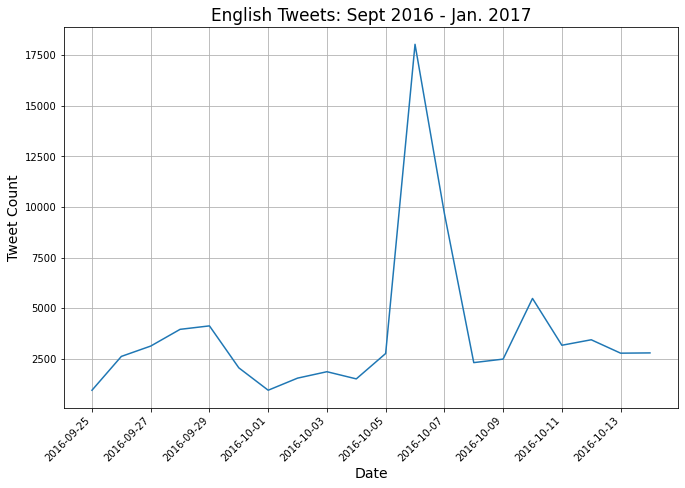

In [19]:
import matplotlib.pyplot as plt # if you don't do .pyplot you get error for labels

plt.figure(figsize=(11,7))

# Count the number of times a date appears and convert to dataframe
tweet_trend = pd.DataFrame(tr_en_msk['publish_date_Only'].value_counts())

# sort dates and get count by date:
dd=pd.to_datetime(tr_en_msk['publish_date_Only']).value_counts().sort_index()

plt.plot(dd)

plt.xticks(rotation=45,ha="right")
plt.title('English Tweets: Sept 2016 - Jan. 2017',fontsize=17)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Tweet Count', fontsize = 14)
plt.grid(True)
plt.show()

# Dataset:
## positive- trolls/bot- 3million DS -1
## negative- real people- GWU DS -0 

In [28]:
tr_en_msk.to_csv('bot.csv')

In [31]:
tr_en_msk['content'].to_csv("bot1.csv")